# Exploratory and data analysis

## Questions to answer during this part
- What question(s) are you trying to solve?
- What kind of data do you have and how to treat different types?
- What’s missing from the data and how do you deal with it?
- Where are the outliers and why you should be paying attention to them?
- How can you add, change or remove features to get more out of your data?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score,  classification_report
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing

## Data import

In [2]:
DATADIR_Train = '/home/infres/abiapo/prim/data/CSV-01-12/01-12'
DATADIR_Test = '/home/infres/abiapo/prim/data/CSV-03-11/03-11'

### Training data import

In [3]:
dns = pd.read_csv(DATADIR_Train+'/DrDoS_DNS.csv',low_memory=False)
ldap = pd.read_csv(DATADIR_Train+'/DrDoS_LDAP.csv',low_memory=False)
mssql = pd.read_csv(DATADIR_Train+'/DrDoS_MSSQL.csv',low_memory=False)
netbios = pd.read_csv(DATADIR_Train+'/DrDoS_NetBIOS.csv',low_memory=False)
ntp = pd.read_csv(DATADIR_Train+'/DrDoS_NTP.csv',low_memory=False)
snmp = pd.read_csv(DATADIR_Train+'/DrDoS_SNMP.csv',low_memory=False)
ssdp = pd.read_csv(DATADIR_Train+'/DrDoS_SSDP.csv',low_memory=False)
udp = pd.read_csv(DATADIR_Train+'/DrDoS_UDP.csv',low_memory=False)
syn = pd.read_csv(DATADIR_Train+'/Syn.csv',low_memory=False)
tftp = pd.read_csv(DATADIR_Train+'/TFTP.csv',low_memory=False)
udplag = pd.read_csv(DATADIR_Train+'/UDPLag.csv',low_memory=False)

In [4]:
data = pd.concat([dns,ldap,mssql,netbios,ntp,snmp,ssdp,ssdp,udp,syn,tftp,udplag])

In [ ]:
#data.to_csv(DATADIR_Train+'/traindata.csv',header=True,index=False)

In [7]:
data.head()

,Unnamed:_0,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [6]:
data = data.drop_duplicates()
data = data.dropna()

data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('/', '_')

In [8]:
data.head()

,Unnamed:_0,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [15]:
len(data)

49814088

In [9]:
df_plot = data['Label'].value_counts().to_frame()

In [10]:
df_plot = df_plot.reset_index(level=0).rename(columns={'index':'Traffic'})
df_plot

,Traffic,Label
0,TFTP,20072108
1,DrDoS_SNMP,5159863
2,DrDoS_DNS,5071002
3,DrDoS_MSSQL,4522489
4,DrDoS_NetBIOS,4093273
5,DrDoS_UDP,3134643
6,DrDoS_SSDP,2610610
7,DrDoS_LDAP,2179928
8,Syn,1380015
9,DrDoS_NTP,1202639


<AxesSubplot:xlabel='Label', ylabel='Traffic'>

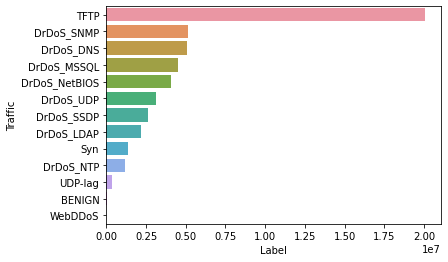

In [11]:
sns.barplot(data=df_plot, y="Traffic",x="Label")

In [37]:
data = data.drop(['Unnamed:_0'],axis=1)

In [14]:
data.isna().sum().sum()

0

In [38]:
data.Label.loc[data.Label == "BENIGN"] = 0
data.Label.loc[data.Label != 0] = 1

/tmp/ipykernel_2658435/1645153508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Label.loc[data.Label == "BENIGN"] = 0
/tmp/ipykernel_2658435/1645153508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Label.loc[data.Label != 0] = 1


In [41]:
data['Label'].value_counts()

1    49757338
0       56750
Name: Label, dtype: int64

In [43]:
cnts = data['Label'].value_counts()
benign = cnts[0]
by_class = data.groupby('Label')

In [44]:
datasets = {}
for groups, dt in by_class:
    datasets[groups] = dt
a = datasets[1]
b = datasets[0]

In [45]:
a

,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370599,172.16.0.5-192.168.50.1-60489-27808-6,172.16.0.5,60489,192.168.50.1,27808,6,2018-12-01 13:30:30.739595,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
370600,172.16.0.5-192.168.50.1-60490-14102-6,172.16.0.5,60490,192.168.50.1,14102,6,2018-12-01 13:30:30.740273,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
370601,172.16.0.5-192.168.50.1-60491-58360-6,172.16.0.5,60491,192.168.50.1,58360,6,2018-12-01 13:30:30.740323,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
370602,172.16.0.5-192.168.50.1-60492-2905-6,172.16.0.5,60492,192.168.50.1,2905,6,2018-12-01 13:30:30.740374,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [46]:
b

,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label
27,192.168.50.8-125.56.201.115-59099-80-6,192.168.50.8,59099,125.56.201.115,80,6,2018-12-01 10:51:40.379825,110861755,26,26,...,64223.338986,392446.0,179351.0,9.863210e+06,413171.813769,10007500.0,8632089.0,detectportal.firefox.com/success.txt,0,0
31,192.168.50.8-54.218.239.186-59102-443-6,192.168.50.8,59102,54.218.239.186,443,6,2018-12-01 10:51:40.504696,40335006,9,10,...,43.554563,90287.0,90185.0,9.993447e+06,40495.753715,10018634.0,9933709.0,0,0,0
53,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 10:51:41.309691,113244633,56,0,...,859690.585416,2978061.0,4.0,9.188876e+06,809901.667647,9882838.0,6781893.0,0,0,0
93,192.168.50.8-23.15.4.11-59155-80-6,192.168.50.8,59155,23.15.4.11,80,6,2018-12-01 10:51:43.125459,95628949,21,20,...,177.422362,15367.0,14798.0,1.001418e+07,5184.077926,10016037.0,10000366.0,0,0,0
94,172.217.0.110-192.168.50.8-80-59131-6,192.168.50.8,59131,172.217.0.110,80,6,2018-12-01 10:51:43.141041,95613243,21,20,...,17.902514,26534.0,26473.0,1.000431e+07,21.430119,10004365.0,10004289.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278588,192.168.50.6-4.2.2.4-54916-53-17,192.168.50.6,54916,4.2.2.4,53,17,2018-12-01 13:30:14.888769,20788,2,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,0,0
278717,192.168.50.6-8.8.8.8-54916-53-17,192.168.50.6,54916,8.8.8.8,53,17,2018-12-01 13:30:14.908666,45913,2,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,0,0
278720,192.168.50.6-4.2.2.4-50731-53-17,192.168.50.6,50731,4.2.2.4,53,17,2018-12-01 13:30:14.910274,20788,2,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,0,0
325145,192.168.10.50-192.168.50.8-21-59982-6,192.168.50.8,59982,192.168.10.50,21,6,2018-12-01 13:30:23.154472,3009540,4,0,...,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,0


In [64]:
smple = a.sample(n = benign) 
balance_data = pd.concat([b,smple])
balance_data = shuffle(balance_data)

In [65]:
balance_data['Source_IP'] = balance_data['Source_IP'].apply(lambda ip: int(ipaddress.ip_address(ip)))
balance_data['Destination_IP'] = balance_data['Destination_IP'].apply(lambda ip: int(ipaddress.ip_address(ip)))

In [68]:
def print_best_valued_feature(df):

    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    X = df.iloc[:,0:29]  #independent columns
    y = df.iloc[:,-1]    #target column i.e price range
    #apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k=20)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(20,'Score'))  #print 10 best features
    
    #===========================================================================
    X = df.iloc[:,0:29]  #independent columns
    y = df.iloc[:,-1]    #target column i.e price range
    from sklearn.ensemble import ExtraTreesClassifier
    import matplotlib.pyplot as plt
    model = ExtraTreesClassifier()
    model.fit(X,y)
    #print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(15).plot(kind='barh')
    plt.show()

In [70]:
names = ['Destination_IP',  
         'Flow_Duration',
         'Source_IP',
         'Total_Length_of_Bwd_Packets',
         'Bwd_IAT_Mean',
         'Fwd_IAT_Mean',
         'Flow_IAT_Mean',
         'Destination_Port',
         'Bwd_Packet_Length_Mean',
         'Source_Port',
         'Average_Packet_Size',
         'Total_Backward_Packets',
         'Subflow_Bwd_Packets',
         'Fwd_Packet_Length_Mean',
         'Packet_Length_Mean',
         'Total_Fwd_Packets',
         'Subflow_Fwd_Packets',
         'Total_Length_of_Fwd_Packets',
         'Down_Up_Ratio',
         'Protocol',
         'Label']
    
balance_data = balance_data[names]

In [71]:
def splitdataset(balance_data): 
    # Separating the target variable 
    X = balance_data.iloc[:,0:20]  #independent columns
    Y = balance_data.iloc[:,-1] 
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)   
    return X, Y, X_train, X_test, y_train, y_test 

In [73]:
def cal_accuracy(y_test, y_pred): 
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))   
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
    print("Report : ", classification_report(y_test, y_pred)) 

In [101]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(balance_data)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [98]:
X_train

,Destination_IP,Flow_Duration,Source_IP,Total_Length_of_Bwd_Packets,Bwd_IAT_Mean,Fwd_IAT_Mean,Flow_IAT_Mean,Destination_Port,Bwd_Packet_Length_Mean,Source_Port,Average_Packet_Size,Total_Backward_Packets,Subflow_Bwd_Packets,Fwd_Packet_Length_Mean,Packet_Length_Mean,Total_Fwd_Packets,Subflow_Fwd_Packets,Total_Length_of_Fwd_Packets,Down_Up_Ratio,Protocol
2367,67240452,20831,3232248326,144.0,2.0,2.000000,6943.666667,53,72.0,52628,69.00,2,2,44.00,55.200000,2,2,88.0,1.0,17
12195,2899905124,1,3232248326,0.0,0.0,1.000000,1.000000,443,0.0,56694,31.00,0,0,15.50,20.666667,2,2,31.0,0.0,6
871166,598128820,1,3232248327,0.0,0.0,1.000000,1.000000,443,0.0,51622,0.00,0,0,0.00,0.000000,2,2,0.0,0.0,6
10168827,3232248321,43,2886729733,0.0,0.0,43.000000,43.000000,64481,0.0,24240,774.00,0,0,516.00,516.000000,2,2,1032.0,0.0,17
20089135,67240452,20620,3232248326,156.0,2.0,3.000000,6873.333333,53,78.0,52333,76.50,2,2,50.00,61.200000,2,2,100.0,1.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53266,67240452,20877,3232248327,630.0,1.0,1.000000,6959.000000,53,315.0,58503,181.50,2,2,32.00,145.200000,2,2,64.0,1.0,17
8606568,3232248321,2990108,2886729733,0.0,0.0,996702.666667,996702.666667,54521,0.0,62632,645.00,0,0,516.00,516.000000,4,4,2064.0,0.0,17
296099,2899904257,263,3232248328,0.0,0.0,87.666667,87.666667,443,0.0,59009,42.25,0,0,30.75,33.800000,4,4,123.0,0.0,6
2588522,3232248321,1,2886729733,0.0,0.0,1.000000,1.000000,26804,0.0,831,2208.00,0,0,1472.00,1472.000000,2,2,2944.0,0.0,17


In [102]:
from sklearn.tree import DecisionTreeClassifier 
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf_entropy.fit(X_train, y_train) 
y_pred_entropy = clf_entropy.predict(X_test)
cal_accuracy(y_test, y_pred_entropy)

Confusion Matrix: 
[[17205     1]
 [    0 16844]]
Accuracy :  99.9970631424376
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     17206
           1       1.00      1.00      1.00     16844

    accuracy                           1.00     34050
   macro avg       1.00      1.00      1.00     34050
weighted avg       1.00      1.00      1.00     34050



In [103]:
#Naive Bayes
print("-----------Naive Bayes----------")
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train.to_list()) 
y_pred_nb = gnb.predict(X_test)
cal_accuracy(y_test, y_pred_nb) 

-----------Naive Bayes----------
Confusion Matrix: 
[[15892  1314]
 [   75 16769]]
Accuracy :  95.92070484581498
Report :                precision    recall  f1-score   support

           0       1.00      0.92      0.96     17206
           1       0.93      1.00      0.96     16844

    accuracy                           0.96     34050
   macro avg       0.96      0.96      0.96     34050
weighted avg       0.96      0.96      0.96     34050



In [104]:
#Logistic Regression
print("-----------Logistic Regression----------")
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', random_state = 0)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
cal_accuracy(y_test, y_pred_lr)

-----------Logistic Regression----------
Confusion Matrix: 
[[11002  6204]
 [   38 16806]]
Accuracy :  81.66813509544787
Report :                precision    recall  f1-score   support

           0       1.00      0.64      0.78     17206
           1       0.73      1.00      0.84     16844

    accuracy                           0.82     34050
   macro avg       0.86      0.82      0.81     34050
weighted avg       0.86      0.82      0.81     34050



In [106]:
#Support Vector Machine
print("-----------Support Vector Machine----------")
from sklearn.svm import SVC
clf = SVC(kernel = 'poly', random_state = 0)
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
cal_accuracy(y_test, y_pred_svc)

-----------Support Vector Machine----------
Confusion Matrix: 
[[15611  1595]
 [    8 16836]]
Accuracy :  95.29221732745961
Report :                precision    recall  f1-score   support

           0       1.00      0.91      0.95     17206
           1       0.91      1.00      0.95     16844

    accuracy                           0.95     34050
   macro avg       0.96      0.95      0.95     34050
weighted avg       0.96      0.95      0.95     34050



In [107]:
#K Nearest Neighbor
print("-----------K Nearest Neighbor----------")
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cal_accuracy(y_test, y_pred_knn)

-----------K Nearest Neighbor----------
Confusion Matrix: 
[[17205     1]
 [    0 16844]]
Accuracy :  99.9970631424376
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     17206
           1       1.00      1.00      1.00     16844

    accuracy                           1.00     34050
   macro avg       1.00      1.00      1.00     34050
weighted avg       1.00      1.00      1.00     34050



In [108]:
#Random Forest
print("-----------Random Forest----------")
from sklearn.ensemble import RandomForestClassifier
rndForest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rndForest.fit(X_train,y_train)
y_pred_rf = rndForest.predict(X_test)
cal_accuracy(y_test, y_pred_rf)

-----------Random Forest----------
Confusion Matrix: 
[[17206     0]
 [    2 16842]]
Accuracy :  99.99412628487518
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     17206
           1       1.00      1.00      1.00     16844

    accuracy                           1.00     34050
   macro avg       1.00      1.00      1.00     34050
weighted avg       1.00      1.00      1.00     34050

